# Защита персональных данных клиентов

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df = pd.read_csv('/datasets/insurance.csv')

In [3]:
df.info()  # получим информацию о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Данные хорошие, пропусков нет. 

In [4]:
df.describe() # выведем статистическую информацию о данных

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Переименуем столбцы:

In [5]:
df.columns = ['gender', 'age', 'salary', 'family', 'payments']

In [6]:
df["salary"] = df["salary"].round().astype(int) # округлим и приведем к целому типу

In [7]:
df["age"] = df["age"].round().astype(int)

In [8]:
df.head(5)

,gender,age,salary,family,payments
0,1,41,49600,1,0
1,0,46,38000,1,1
2,0,29,21000,0,0
3,0,21,41700,2,0
4,1,28,26100,0,0


**Признаки**: пол, возраст и зарплата застрахованного, количество членов его семьи. <br/>
**Целевой признак**: количество страховых выплат клиенту за последние 5 лет.

In [9]:
X = df.drop('payments', axis=1) 
y = df['payments']

In [10]:
print(X.shape)
print(y.shape)

(5000, 4)
(5000,)


Оценим коэффициент корреляции между возрастом и количеством страховых выплат клиентов:

In [11]:
df['age'].corr(df['payments'])

0.6510300979467256

<AxesSubplot:xlabel='age'>

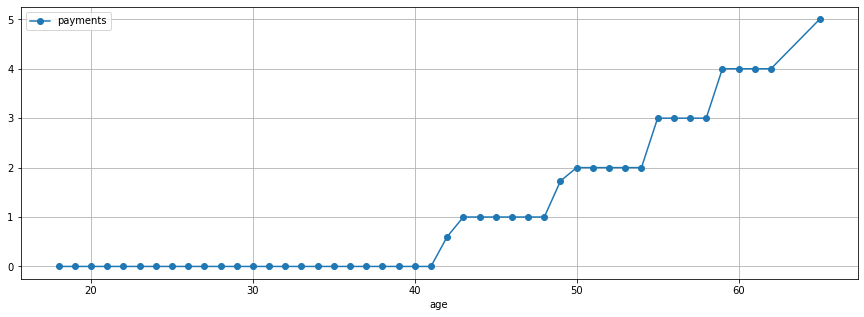

In [12]:
(df
 .pivot_table(index = 'age', values = 'payments')
 .plot(grid=True, style='o-', figsize=(15,5))
 ) 

Коэффициент корреляции Пирсона между возрастом и количеством страховых выплат клиентов равен 0,651. Что говорит о том, что при увеличении возраста клиентов ростет и количество страховых выплат, но рост слабый. <br/>
На графике видно, что клиенты в возрасте до 42 лет не получили ни одной выплаты, до 55 - 2 выплаты, до 65 - 4.Один клиент в возрасте 65 лет получил выплату 5 раз. 

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)
- $w*$ - вектор весов линейной регрессии матрицы полученной домножение исходной на обратимую матрицу(нулевой элемент равен сдвигу)
- $a$ - вектор предсказаний по исходной матрице
- $a*$ - вектор предсказаний, полученный по исходной матрице, домноженной на обратимую

1. Произведем умножение исходной матрицы на обратимую и выясним изменится ли качество линейной регрессии? 

**Исходня матрица признаков X:**

Предсказания:

$$
a = Xw
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Тогда формула предсказания будет такой: 

$$
a = X(X^T X)^{-1} X^T y
$$


**Матрица признаков X.dot(P):**

Предсказания: 
$$
a = XPw
$$

Обучение: 
$$
w = ((XP)^T XP)^{-1} (XP)^T y
$$

Используя преобразования, получим :
$$
w = (P^T(X^TX)P)^{-1} P^TX^T y = P^{-1}(X^TX)^{-1}(P^T)^{-1}P^TX^Ty
$$

Так как $(P^T)^{-1}P^T = E$, получаем: 
$$ 
w = P^{-1}(X^TX)^{-1}X^Ty
$$

Отсюда получим предсказание: 
$$
a = XPw = XPP^{-1}(X^TX)^{-1}X^Ty = X(X^TX)^{-1}X^Ty
$$

**Ответ:** Получили результат: формулы для предсказаний точно совпадают. Т.е умножение матрицы признаков на обратимую матрицу не влияет на результат предсказания для модели линейной регрессии. 

Создадим различные матрицы: 

In [13]:
E = np.eye(4) # единичная матрица
E

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [14]:
X_E = X.dot(E) # получим произведение матрицы признаков на единичную
X_E.shape

(5000, 4)

In [15]:
Z = np.random.normal(size =(4, 4)) # рандомная матрица

Проверим существует ли к полученной матрице обратная:

In [16]:
Z_1 = np.linalg.inv(Z)

In [17]:
Z_1

array([[ 0.33971695, -0.60965119,  0.54360916,  0.97670203],
       [-0.69840337, -1.07939297,  0.81706324,  1.41046343],
       [-0.27492498, -1.98339192,  0.64598338,  1.86043865],
       [-0.72632636, -1.73850984,  0.82268265,  1.18657519]])

Полученная матрица имеет обратную, значит она обратима. 

In [18]:
Z.shape

(4, 4)

In [19]:
X_Z = X.dot(Z)
X_Z.shape

(5000, 4)

Напишем функцию подсчета метрик R2 и MSE для линейной регрессии:

In [20]:
def metrics_r2(X,y):  # ф-ия подчета метрики R2
    model = LinearRegression()
    model.fit(X,y)
    predict = model.predict(X)
    return r2_score(y, predict)

In [21]:
print("Метрика R2 для линейной регрессии матрицы признаков:", metrics_r2(X,y))

Метрика R2 для линейной регрессии матрицы признаков: 0.4249455028666801


In [22]:
print("Метрика R2 для линейной регрессии матрицы признаков, умноженной на рандомную матрицу:", metrics_r2(X_Z,y))

Метрика R2 для линейной регрессии матрицы признаков, умноженной на рандомную матрицу: 0.4249455028666683


In [23]:
print("Метрика R2 для линейной регрессии матрицы признаков, умноженной на единичную матрицу:", metrics_r2(X_E,y))

Метрика R2 для линейной регрессии матрицы признаков, умноженной на единичную матрицу: 0.4249455028666801


In [24]:
def metrics_mse(X,y):  # ф-ия подчета метрики MSE
    model = LinearRegression()
    model.fit(X,y)
    predict = model.predict(X)
    return mean_squared_error(y,predict)

In [25]:
print("Метрика MSE для линейной регрессии матрицы признаков:", metrics_mse(X,y))

Метрика MSE для линейной регрессии матрицы признаков: 0.12334688941710859


In [26]:
print("Метрика MSE для линейной регрессии матрицы признаков, умноженной на рандомную матрицу:", metrics_mse(X,y))

Метрика MSE для линейной регрессии матрицы признаков, умноженной на рандомную матрицу: 0.12334688941710859


In [27]:
print("Метрика MSE для линейной регрессии матрицы признаков, умноженной на единичную матрицу:",  metrics_mse(X_E,y))

Метрика MSE для линейной регрессии матрицы признаков, умноженной на единичную матрицу: 0.12334688941710859


С использованием метрик R2 и MSE видно, что при умножении единичной и рандомной матриц на матрицу признаков значение метрик не меняется. Это подтвержает теорию, полученную выше. <br/>
Предсказание исходной матрицы = предсказаниям исходной умноженной на обратимую. 

## Алгоритм преобразования

Матрицу признаков можно умножить на обратимую, как показали вычисления на результат это не повлияет. Результат умножения матриц:

In [28]:
X_Z

,0,1,2,3
0,87641.768965,-1569.301930,-94816.024717,78388.582085
1,67145.021416,-1183.994129,-72645.651593,60040.931697
2,37106.932992,-650.701607,-40147.876473,33177.868221
3,73680.180919,-1333.097255,-79709.075329,65914.531243
4,46119.228776,-819.271036,-49895.568651,41243.447900
...,...,...,...,...
4995,63079.410433,-1129.123190,-68243.015735,56420.143974
4996,92587.250659,-1667.860920,-100165.690056,82822.752010
4997,59898.379539,-1079.863625,-64800.051208,53581.736595
4998,57779.177341,-1038.282376,-62506.156439,51680.912901


## Проверка алгоритма

Разделим данные на обучающую выборку и тестовую:

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=12345)

In [30]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3750, 4) (1250, 4) (3750,) (1250,)


In [31]:
model = LinearRegression() 
model.fit(X_train, y_train) # обучим 
predict = model.predict(X_test)  # проведем предсказания на тестовой выборке
R2 = r2_score(y_test, predict)
print("Метрика R2 для модели линейная регрессия", R2)

Метрика R2 для модели линейная регрессия 0.43522757127026546


In [32]:
X_test_Z = X_test.dot(Z)  # Домножим тестовую выборку на рандомную обратимую матрицу. 
X_test_Z.shape

(1250, 4)

Получим предсказание и посчитаем метрику R2:

In [33]:
predict_Z = model.predict(X_test_Z)  # проведем предсказания на тестовой выборке
R2_Z = r2_score(y_test, predict_Z)
print("Метрика R2 для на модели линейная регрессия c преобразованиями", R2)

Метрика R2 для на модели линейная регрессия c преобразованиями 0.43522757127026546


## Вывод:

Значения метрик R2 для моделей линейной регрессии для тестовой выборки и тестовой выборки, умноженной на обратимую матрицу, абсолютно совпали. Это говорит о том, что качество линейной регрессии не отличается от регрессии до преобразований. Что и требовалось доказать! 